<a href="https://colab.research.google.com/github/Sri-Chakradhar/Stock_Predictor/blob/main/Stock_Predcitor2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

df = pd.read_csv("MSFT.csv")
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1986-03-13,0.088542,0.101563,0.088542,0.097222,0.060055,1031788800
1,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.062199,308160000
2,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.063272,133171200
3,1986-03-18,0.102431,0.103299,0.098958,0.099826,0.061663,67766400
4,1986-03-19,0.099826,0.100694,0.097222,0.098090,0.060591,47894400
...,...,...,...,...,...,...,...
9665,2024-07-22,441.790009,444.600006,438.910004,442.940002,442.940002,15808800
9666,2024-07-23,443.899994,448.390015,443.100006,444.850006,444.850006,13107100
9667,2024-07-24,440.450012,441.480011,427.589996,428.899994,428.899994,26805800
9668,2024-07-25,428.799988,429.799988,417.510010,418.399994,418.399994,29943800


In [ ]:
df = df[['Date','Close']]
df

,Date,Close
0,1986-03-13,0.097222
1,1986-03-14,0.100694
2,1986-03-17,0.102431
3,1986-03-18,0.099826
4,1986-03-19,0.098090
...,...,...
9665,2024-07-22,442.940002
9666,2024-07-23,444.850006
9667,2024-07-24,428.899994
9668,2024-07-25,418.399994


In [ ]:
df['Date']

0       1986-03-13
1       1986-03-14
2       1986-03-17
3       1986-03-18
4       1986-03-19
           ...    
9665    2024-07-22
9666    2024-07-23
9667    2024-07-24
9668    2024-07-25
9669    2024-07-26
Name: Date, Length: 9670, dtype: object

In [ ]:
import datetime

def str_to_date(s):
    return datetime.datetime.strptime(s, '%Y-%m-%d')

df['Date'] = df['Date'].apply(str_to_date)
df

<ipython-input-23-98c290e19781>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = df['Date'].apply(str_to_date)


,Date,Close
0,1986-03-13,0.097222
1,1986-03-14,0.100694
2,1986-03-17,0.102431
3,1986-03-18,0.099826
4,1986-03-19,0.098090
...,...,...
9665,2024-07-22,442.940002
9666,2024-07-23,444.850006
9667,2024-07-24,428.899994
9668,2024-07-25,418.399994


In [ ]:
df.index = df.pop('Date')
df

,Close
Date,
1986-03-13,0.097222
1986-03-14,0.100694
1986-03-17,0.102431
1986-03-18,0.099826
1986-03-19,0.098090
...,...
2024-07-22,442.940002
2024-07-23,444.850006
2024-07-24,428.899994


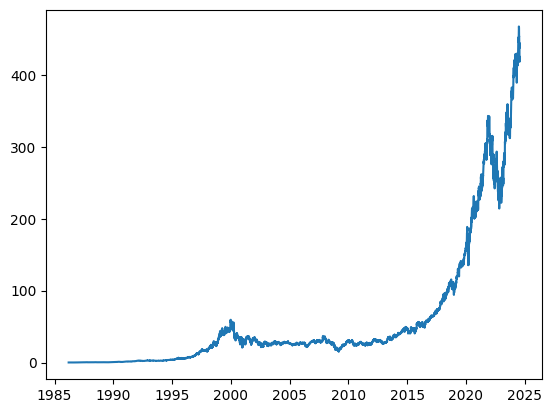

In [ ]:
import matplotlib.pyplot as plt

plt.plot(df.index, df['Close'])
plt.show()

In [ ]:
import numpy as np

def df_to_windowed_df(dataframe, first_date_str, last_date_str, n=3):
  first_date = str_to_date(first_date_str)
  last_date  = str_to_date(last_date_str)

  target_date = first_date

  dates = []
  X, Y = [], []

  last_time = False
  while True:
    df_subset = dataframe.loc[:target_date].tail(n+1)

    if len(df_subset) != n+1:
      print(f'Error: Window of size {n} is too large for date {target_date}')
      return

    values = df_subset['Close'].to_numpy()
    x, y = values[:-1], values[-1]

    dates.append(target_date)
    X.append(x)
    Y.append(y)

    next_week = dataframe.loc[target_date:target_date+datetime.timedelta(days=7)]
    next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
    next_date_str = next_datetime_str.split('T')[0]
    year_month_day = next_date_str.split('-')
    year, month, day = year_month_day
    next_date = datetime.datetime(day=int(day), month=int(month), year=int(year))

    if last_time:
      break

    target_date = next_date

    if target_date == last_date:
      last_time = True

  ret_df = pd.DataFrame({})
  ret_df['Target Date'] = dates

  X = np.array(X)
  for i in range(0, n):
    X[:, i]
    ret_df[f'Target-{n-i}'] = X[:, i]

  ret_df['Target'] = Y

  return ret_df

windowed_df = df_to_windowed_df(df,
                                '2021-03-25',
                                '2022-03-23',
                                n=3)
windowed_df

,Target Date,Target-3,Target-2,Target-1,Target
0,2021-03-25,235.990005,237.580002,235.460007,232.339996
1,2021-03-26,237.580002,235.460007,232.339996,236.479996
2,2021-03-29,235.460007,232.339996,236.479996,235.240005
3,2021-03-30,232.339996,236.479996,235.240005,231.850006
4,2021-03-31,236.479996,235.240005,231.850006,235.770004
...,...,...,...,...,...
247,2022-03-17,276.440002,287.149994,294.390015,295.220001
248,2022-03-18,287.149994,294.390015,295.220001,300.429993
249,2022-03-21,294.390015,295.220001,300.429993,299.160004
250,2022-03-22,295.220001,300.429993,299.160004,304.059998


In [ ]:
def windowed_df_data_X_Y(windowed_df):
  df_as_numpy = windowed_df.to_numpy()
  dates = df_as_numpy[:, 0]
  middle_matrix = df_as_numpy[:, 1:-1]
  Y = df_as_numpy[:, -1]

  X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))

  return dates, X.astype(np.float32), Y.astype(np.float32)

dates,X,Y = windowed_df_data_X_Y(windowed_df)

dates.shape, X.shape, Y.shape

((252,), (252, 3, 1), (252,))

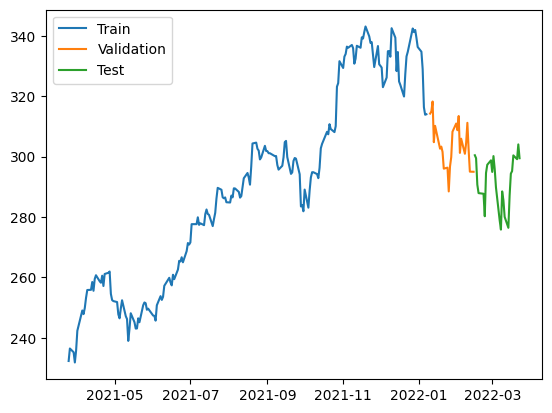

In [ ]:
q_80 = int(len(dates) * .8)
q_90 = int(len(dates) * .9)

dates_train, X_train, y_train = dates[:q_80], X[:q_80], Y[:q_80]

dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], Y[q_80:q_90]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], Y[q_90:]

plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)

plt.legend(['Train', 'Validation', 'Test'])

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

model = Sequential([
    layers.Input((3, 1)),
    layers.LSTM(64),
    layers.Dense(32,activation = 'relu' ),
    layers.Dense(32,activation = 'relu' ),
    layers.Dense(1)])

model.compile(loss='mse',
              optimizer=Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'])

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100)

Epoch 1/100
7/7 [==============================] - 3s 105ms/step - loss: 84769.4844 - mean_absolute_error: 289.4116 - val_loss: 92462.4609 - val_mean_absolute_error: 303.9893
Epoch 2/100
7/7 [==============================] - 0s 10ms/step - loss: 84514.0000 - mean_absolute_error: 288.9707 - val_loss: 92226.8828 - val_mean_absolute_error: 303.6016
Epoch 3/100
7/7 [==============================] - 0s 9ms/step - loss: 84329.4453 - mean_absolute_error: 288.6516 - val_loss: 92049.2812 - val_mean_absolute_error: 303.3090
Epoch 4/100
7/7 [==============================] - 0s 9ms/step - loss: 84145.2969 - mean_absolute_error: 288.3328 - val_loss: 91820.9766 - val_mean_absolute_error: 302.9323
Epoch 5/100
7/7 [==============================] - 0s 9ms/step - loss: 83897.4844 - mean_absolute_error: 287.9014 - val_loss: 91484.7109 - val_mean_absolute_error: 302.3768
Epoch 6/100
7/7 [==============================] - 0s 9ms/step - loss: 83497.7031 - mean_absolute_error: 287.2052 - val_loss: 90940.

7/7 [==============================] - 1s 3ms/step


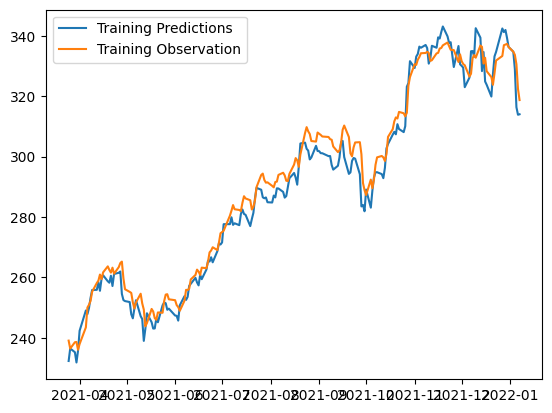

In [ ]:
train_predictions = model.predict(X_train).flatten()

plt.plot(dates_train, y_train)
plt.plot(dates_train, train_predictions)

plt.legend(['Training Predictions', 'Training Observation'])

1/1 [==============================] - 0s 25ms/step


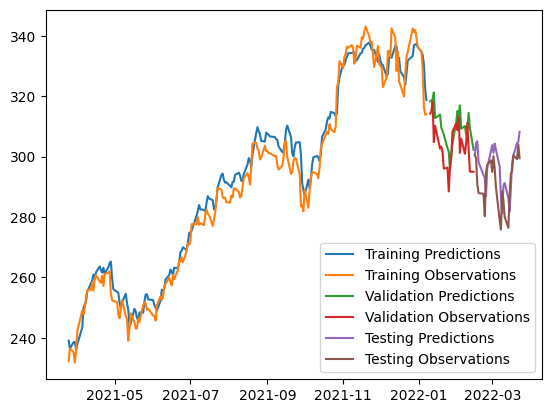

In [ ]:
val_predictions = model.predict(X_val).flatten()
test_predictions = model.predict(X_test).flatten()

plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Training Predictions',
            'Training Observations',
            'Validation Predictions',
            'Validation Observations',
            'Testing Predictions',
            'Testing Observations'])